## Observations and Insights 

# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1: Capomulin appears to be quite an effective treatment on the mouse, for mouse s185, the tumor decreased over time which proves it's effectiveness

2: Mouse weight seems to have a direct effect on the tumor size, the larger the mouse the bigger the tumor, implying that the mice should be on better diets

3: Infubinol appears to be the least effective of the 4 drug regimens checked

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
comb_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [144]:
# Checking the number of mice.
nummice = len(comb_data["Mouse ID"])
nummice

1893

In [145]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupemice = comb_data.loc[comb_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


In [146]:
# Optional: Get all the data for the duplicate mouse ID. 
alldupes = pd.DataFrame(dupemice)
alldupes


,0
0,g989


In [147]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_data[comb_data["Mouse ID"].isin(dupemice)==False]

In [148]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
num_clean_mice = len(clean_mice)
num_clean_mice

248

## Summary Statistics

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

reg_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_mean
reg_med = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_med
reg_var = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_var
reg_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_std
reg_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
reg_sem

sum_stat_table = pd.DataFrame({"Mean": reg_mean, "Median": reg_med, "Variance":reg_var, 
                "Standard Deviation": reg_std, "SEM": reg_sem})
sum_stat_table
sum_stat_table.to_csv("MouseFile1.csv", index=False, header=True)


In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_funct = clean_df.groupby("Drug Regimen")
sum_stat_table2 = single_funct["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
sum_stat_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

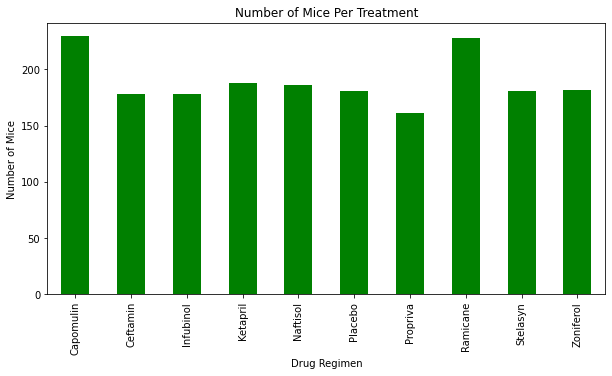

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [151]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_tmt = comb_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = mice_per_tmt.plot.bar(figsize=(10,5), color="green", fontsize=10)
plt.title("Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.savefig("../Images/mice_per_tmt.png", bbox_inches = "tight")
plt.show()
mice_per_tmt

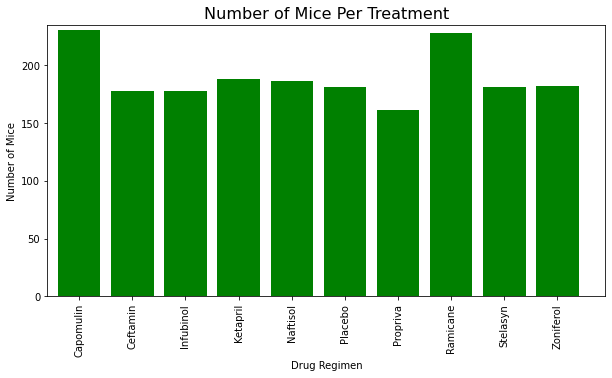

In [152]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = (comb_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(mice_per_tmt))
plt.figure(figsize=(10,5))
plt.bar(x_axis, mice, color="g", align="center")
tick_loc = [value for value in x_axis]

plt.xticks(tick_loc, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                    'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 
                    'Zoniferol'],  rotation='vertical')

plt.xlim(-0.60, len(x_axis)-0.10)
plt.ylim(0, max(mice)+5)
plt.title("Number of Mice Per Treatment", fontsize=16)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.savefig("../Images/mice_per_tmt2.png", bbox_inches = "tight")



In [153]:
gb_gender = comb_data.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(gb_gender.size())

gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]
gender["Percentage of Sex"] = (100*(gender["Total Count"]/gender["Total Count"].sum()))
gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


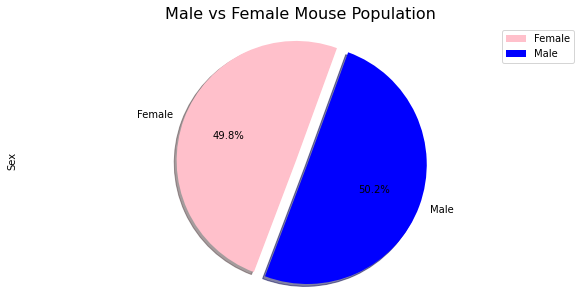

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["Pink", "Blue"]
explode = (0.1, 0)
plot = gender.plot.pie(y="Total Count", colors=colors, explode=explode, shadow=True, figsize=(10,5), autopct="%1.1f%%", startangle=70)
plt.title('Male vs Female Mouse Population',fontsize = 16)
plt.ylabel('Sex')
plt.axis("equal")
plt.savefig("../Images/pd_pie.png",bbox_inches="tight")
plt.show()

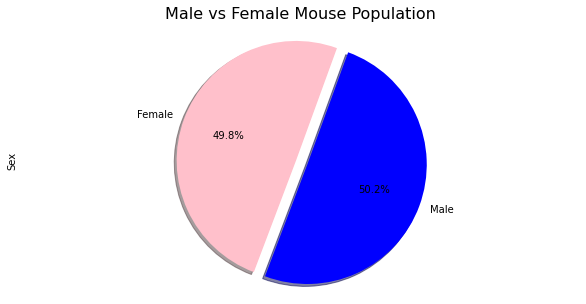

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.799197, 50.200803]
colors = ["pink", "blue"]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=70,)
plt.title('Male vs Female Mouse Population',fontsize = 16)
plt.ylabel('Sex')
plt.axis("equal")

plt.savefig("../Images/py_pie.png",bbox_inches="tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = comb_data.loc[comb_data["Drug Regimen"] == "Capomulin",:]
ram_df = comb_data.loc[comb_data["Drug Regimen"] == "Ramicane",:]
inf_df = comb_data.loc[comb_data["Drug Regimen"] == "Infubinol",:]
cef_df = comb_data.loc[comb_data["Drug Regimen"] == "Ceftamin",:]


In [157]:
# Start by getting the last (greatest) timepoint for each mouse
cap_last = cap_df.groupby("Mouse ID").max()["Timepoint"]
cap_vol = pd.DataFrame(cap_last)
ram_last = ram_df.groupby("Mouse ID").max()["Timepoint"]
ram_vol = pd.DataFrame(ram_last)
inf_last = inf_df.groupby("Mouse ID").max()["Timepoint"]
inf_vol = pd.DataFrame(inf_last)
cef_last = cef_df.groupby("Mouse ID").max()["Timepoint"]
cef_vol = pd.DataFrame(cef_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_comb = pd.merge(cap_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")
ram_comb = pd.merge(ram_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")
inf_comb = pd.merge(inf_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")
cef_comb = pd.merge(cef_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")


In [158]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tum = cap_comb["Tumor Volume (mm3)"].quantile([.25, .5, .75])
caplq = cap_tum[0.25]
capup = cap_tum[0.75]
capiq = capup-caplq
caplo = caplq - (1.5*capiq)
capuo = capup + (1.5*capiq)
ram_tum = ram_comb["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ramlq = ram_tum[0.25]
ramup = ram_tum[0.75]
ramiq = ramup-ramlq
ramlo = ramlq - (1.5*ramiq)
ramuo = ramup + (1.5*ramiq)
inf_tum = inf_comb["Tumor Volume (mm3)"].quantile([.25, .5, .75])
inflq = inf_tum[0.25]
infup = inf_tum[0.75]
infiq = infup-inflq
inflo = inflq - (1.5*infiq)
infuo = infup + (1.5*infiq)
cef_tum = cef_comb["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ceflq = cef_tum[0.25]
cefup = cef_tum[0.75]
cefiq = cefup-ceflq
ceflo = ceflq - (1.5*cefiq)
cefuo = cefup + (1.5*cefiq)

#print("The quartiles of Capomulin Tumors are: Lower : {caplq, Upper : {")
print(f"The quartiles of Capomulin Tumors are: Lower : {caplq}, Upper : {capup}, Interquartile : {capiq}, Values below {caplo} or above {capuo} could be outliers")
print(f"The quartiles of Ramicane Tumors are: Lower : {ramlq}, Upper : {ramup}, Interquartile : {ramiq}, Values below {ramlo} or above {ramuo} could be outliers")
print(f"The quartiles of Infubinol Tumors are: Lower : {inflq}, Upper : {infup}, Interquartile : {infiq}, Values below {inflo} or above {infuo} could be outliers")
print(f"The quartiles of Ceftamin Tumors are: Lower : {ceflq}, Upper : {cefup}, Interquartile : {cefiq}, Values below {ceflo} or above {cefuo} could be outliers")

The quartiles of Capomulin Tumors are: Lower : 32.37735684, Upper : 40.1592203, Interquartile : 7.781863460000004, Values below 20.70456164999999 or above 51.83201549 could be outliers
The quartiles of Ramicane Tumors are: Lower : 31.56046955, Upper : 40.65900627, Interquartile : 9.098536719999998, Values below 17.912664470000003 or above 54.30681135 could be outliers
The quartiles of Infubinol Tumors are: Lower : 54.04860769, Upper : 65.52574285, Interquartile : 11.477135160000003, Values below 36.83290494999999 or above 82.74144559000001 could be outliers
The quartiles of Ceftamin Tumors are: Lower : 48.72207785, Upper : 64.29983003, Interquartile : 15.577752179999997, Values below 25.355449580000002 or above 87.66645829999999 could be outliers


In [159]:
# Locate the rows which contain mice on each drug and get the tumor volumes
  last = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
  lasttm_df = pd.DataFrame(last)
  last_df = pd.merge(clean_df, lasttm_df, on=("Mouse ID", "Timepoint"), how="right")
  last_df  

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [160]:

    for index, row in last_df.iterrows():
        if row["Drug Regimen"] == "Capomulin":
            tumor_cap.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == regimens[1]:
            tumor_ram.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == regimens[2]:
            tumor_inf.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == regimens[3]:
            tumor_cef.append(row["Tumor Volume (mm3)"])
    # add subset 
    drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                            regimens[1]: tumor_ram,
                            regimens[2]: tumor_inf,
                            regimens[3]: tumor_cap})
    
    # Determine outliers using upper and lower bounds
    drugmax_df = drug_df.max()
    drugmin_df = drug_df.min()
    drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,23.343598
1,28.484033,29.128472,65.525743,28.484033
2,28.430964,30.276232,57.031862,28.430964
3,30.485985,30.564625,66.083066,30.485985
4,31.023923,30.638696,72.226731,31.023923
5,31.896238,31.560470,36.321346,31.896238
6,32.377357,31.095335,60.969711,32.377357
7,33.329098,33.397653,62.435404,33.329098
8,34.455298,32.978522,60.918767,34.455298
9,37.311846,33.562402,67.289621,37.311846


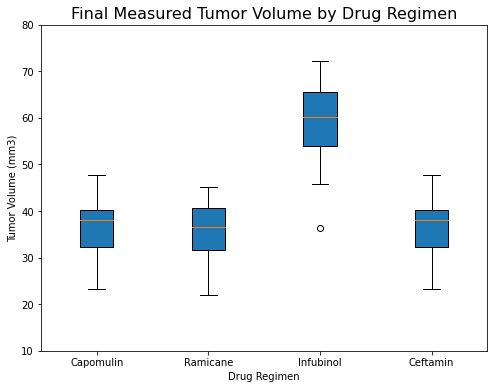

In [161]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplt_list = [drug_df[regimens[0]],
            drug_df[regimens[1]],
            drug_df[regimens[2]],
            drug_df[regimens[3]]]

fig1, ax = plt.subplots(figsize= (8,6))
ax.set_title("Final Measured Tumor Volume by Drug Regimen", fontsize=16)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(boxplt_list, labels=regimens, widths=0.3, patch_artist=True, vert=True)
plt.ylim(10,80)
plt.savefig("../Images/box_plot.png", bbox_inches = "tight")
plt.show()



## Line and Scatter Plots

In [162]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = cap_df.loc[cap_df["Mouse ID"] == "s185",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


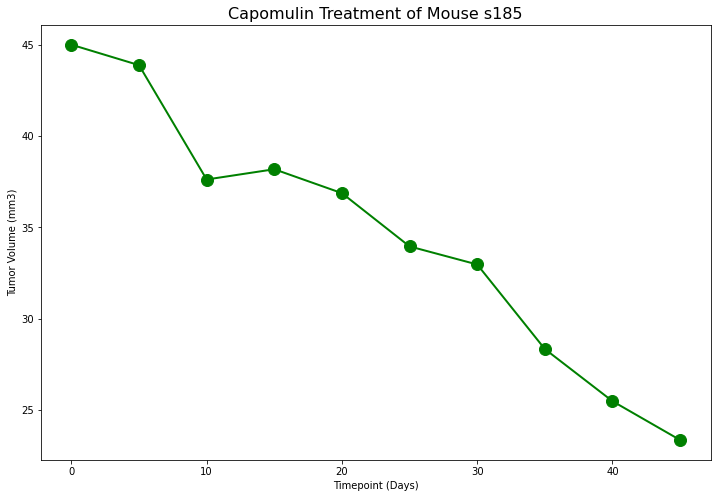

In [163]:
x_axis = line_df["Timepoint"]
tum = line_df["Tumor Volume (mm3)"]
fig1, ax = plt.subplots(figsize=(12, 8))
plt.title("Capomulin Treatment of Mouse s185", fontsize=16)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, tum, linewidth=2, markersize=12, marker="o", color="g")
plt.savefig("../Images/line.png", bbox_inches="tight")
plt.show()

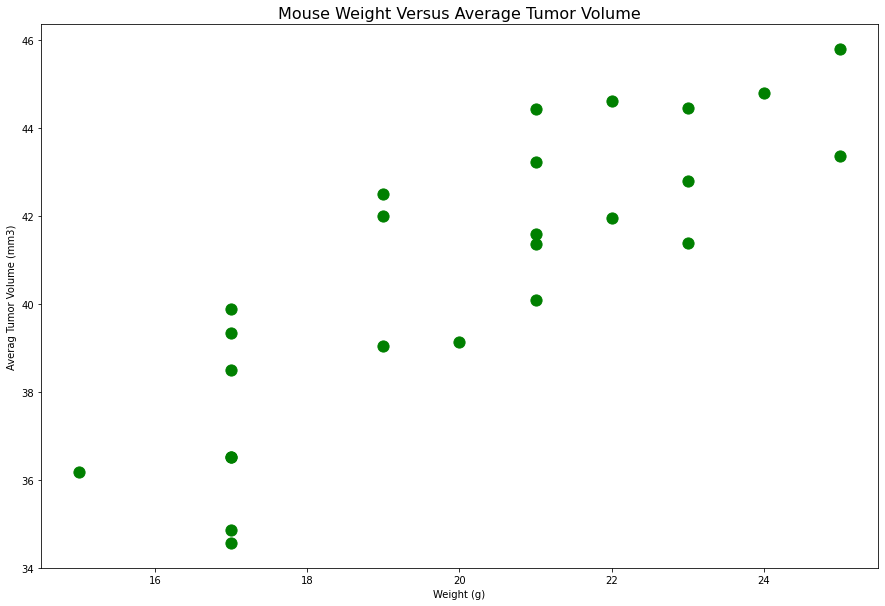

In [164]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol = cap_df.groupby(["Mouse ID"]).mean()

marker_size=15
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],s=125, color="g")
plt.title("Mouse Weight Versus Average Tumor Volume",fontsize =16)
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")


plt.savefig("../Images/scatter.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [166]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


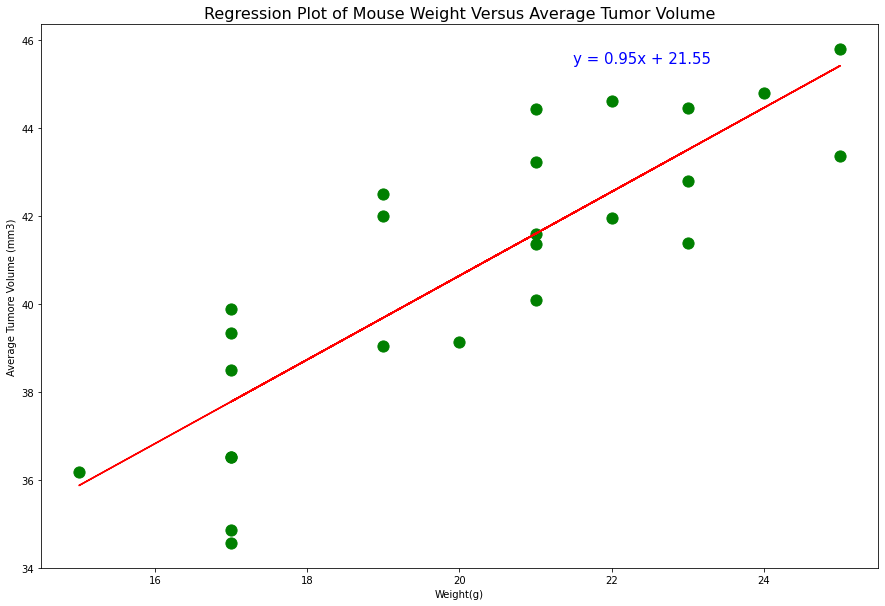

In [167]:
# Add to scatter plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=125, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =16)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="b")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_reg.png", bbox_inches = "tight")
plt.show()